In [20]:
# Extract keyords and important topics
# Wordcloud to show the ones that occur the most often
# Visualizations between employee title, tenure, department and the rating they gave

In [21]:
# Heatmap on a map of the world for grades by location

In [22]:
# Extract the top N positives and negative points that come up in reviews

In [23]:
# General sentiment about the company - different segments of the employee population.

# > What are the segments of people we are interested in? Everyone? Mangers and up?
# > What do we want to know about them? How they feel about the company
# > Why do they feel that way? - Topic Extraction and Clustering
# > How has this changed through time? Were people giving better reviews in 2018?

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
import string

In [25]:
import plotly as py
import cufflinks as cf

In [26]:
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

### Data import

In [39]:
df = pd.read_csv('Data.csv', index_col = 0)
df.head()

,Title,Rating,Employee Status,Pros,Cons,Date Posted,Employee Title,Location,Unnamed: 9
0,Great Culture and Company That Cares,4,Current Employee,Not much politics and very few ego's. Everyone...,Need to focus on career growth and promoting w...,13-Jan-21,Senior Corporate Recruiter in Troy,MI,NaN
1,Shaping the Future of Mobility!,5,"Current Employee, more than 1 year","Global Work Environment, Cutting Edge Technolo...",None to mention at this time.,14-Apr-21,Program Manager in Dublin,Dublin,NaN
2,Lots of potential- getting there,4,"Current Employee, more than 1 year",A very fast paced environment - you definitely...,Training and coaching could be better- high ex...,22-May-21,SCM in Dublin,Dublin,NaN
3,Alright but not the best,3,"Current Employee, more than 1 year","Excellent office, good staff, good pay, good b...","Dis organised, office politics at mid/top leve...",08-Mar-21,Business Analyst in Dublin,Dublin,NaN
4,Aptiv,3,Current Employee,It is one of the leaders in the automotive ind...,"High pressure for hitting numbers, it is more ...",07-Nov-20,Supply Chain in Dublin,Dublin,NaN


In [40]:
df.columns

Index(['Title', 'Rating', 'Employee Status', 'Pros', 'Cons', 'Date Posted',
       'Employee Title', 'Location', 'Unnamed: 9'],
      dtype='object')

In [41]:
# DROP UNWANTED COLUMNS
df.drop(labels=['Unnamed: 9'], axis=1, inplace=True)
df.head()

,Title,Rating,Employee Status,Pros,Cons,Date Posted,Employee Title,Location
0,Great Culture and Company That Cares,4,Current Employee,Not much politics and very few ego's. Everyone...,Need to focus on career growth and promoting w...,13-Jan-21,Senior Corporate Recruiter in Troy,MI
1,Shaping the Future of Mobility!,5,"Current Employee, more than 1 year","Global Work Environment, Cutting Edge Technolo...",None to mention at this time.,14-Apr-21,Program Manager in Dublin,Dublin
2,Lots of potential- getting there,4,"Current Employee, more than 1 year",A very fast paced environment - you definitely...,Training and coaching could be better- high ex...,22-May-21,SCM in Dublin,Dublin
3,Alright but not the best,3,"Current Employee, more than 1 year","Excellent office, good staff, good pay, good b...","Dis organised, office politics at mid/top leve...",08-Mar-21,Business Analyst in Dublin,Dublin
4,Aptiv,3,Current Employee,It is one of the leaders in the automotive ind...,"High pressure for hitting numbers, it is more ...",07-Nov-20,Supply Chain in Dublin,Dublin


Rectangle(xy=(-0.4, 0), width=0.8, height=209, angle=0)
209
Rectangle(xy=(0.6, 0), width=0.8, height=145, angle=0)
145
Rectangle(xy=(1.6, 0), width=0.8, height=118, angle=0)
118
Rectangle(xy=(2.6, 0), width=0.8, height=58, angle=0)
58
Rectangle(xy=(3.6, 0), width=0.8, height=49, angle=0)
49


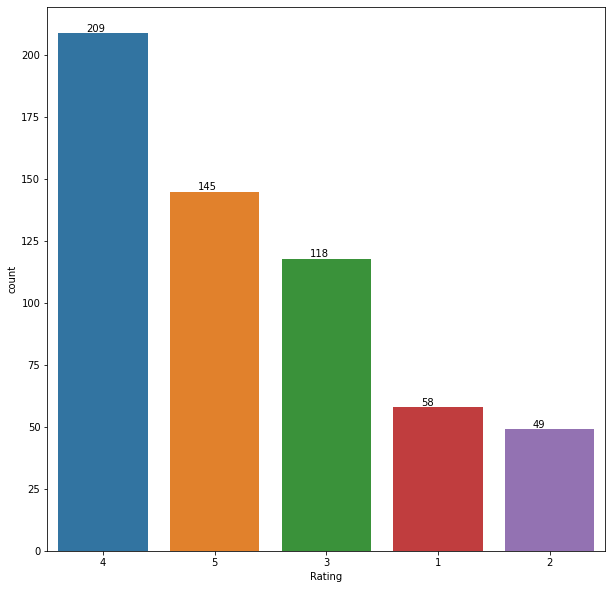

In [12]:
# Ratings allocated to reviews
plt.figure(figsize=(10,10))

ax = sns.countplot(x=df['Rating'], data=df, order=df['Rating'].value_counts().index)
for p, label in zip(ax.patches, df['Rating'].value_counts()):
    print(p)
    print(label)
    ax.annotate(label, (p.get_x()+0.25, p.get_height()+0.5))

In [47]:
# Convert datatype to datetime
df['Date Posted'] =  pd.to_datetime(df['Date Posted'])

In [55]:
# Group by date posted
results = df.groupby('Date Posted').sum()
print(results)

             Rating
Date Posted        
2017-12-05        5
2017-12-16        4
2017-12-19        5
2017-12-26        9
2018-01-10        1
...             ...
2021-05-27       19
2021-05-28        4
2021-05-29        3
2021-05-30        3
2021-06-01        3

[424 rows x 1 columns]


(array([17532., 17713., 17897., 18078., 18262., 18444., 18628., 18809.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

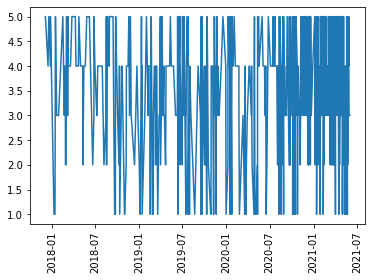

In [64]:

# time_series = pd.DataFrame(df['Rating'].value_counts().reset_index())
# time_series.columns = ['Date Posted', 'Rating']

# time_series.plot(kind='hist')
# plt.show()


# months = range(1,13)

# plt.bar(months, results['Date Posted'])
# plt.xticks(Date Posted)
# plt.ylabel('Ratings')
# plt.xlabel('Month Number')
# plt.show()

df = df.sort_values('Date Posted', ascending=True)
plt.plot(df['Date Posted'], df['Rating'])
plt.xticks(rotation='vertical')

### Feature Engineering

In [65]:
from textblob import TextBlob

In [66]:
# What is the sentiment polarity for a particular text
df['Pros_polarity'] = df['Pros'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [67]:
# Review length - How many characters are there
df['Pros_len'] = df['Pros'].apply(lambda x: len(x))

In [68]:
# Total number of words in the review
df['Pros_Word_count'] = df['Pros'].apply(lambda x: len(x.split()))

In [69]:
# Calculate the aarege word length
def get_avg_word_length(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)

In [70]:
df['Pros_avg_words_len'] = df['Pros'].apply(lambda x: get_avg_word_length(x))

In [71]:
df.head()

,Title,Rating,Employee Status,Pros,Cons,Date Posted,Employee Title,Location,Pros_polarity,Pros_len,Pros_Word_count,Pros_avg_words_len
554,Great Company,5,"Current Employee, more than 5 years",Exciting work! Love working here.,"Has made major progress, but still updating to...",2017-12-05,Electrical Engineer in Kokomo,IN,0.437500,33,5,5.800000
567,Good plan to learn,4,Current Employee,Quite a lot to learn Flexibility in timing,Too much work pressure Politics at workplace,2017-12-16,Anonymous Employee,NaN,0.000000,42,8,4.375000
556,EGM,5,"Current Employee, more than 3 years","Cutting edge technologies, challenging work,di...","Poor work life balance, fire fighting approaches",2017-12-19,Anonymous Employee,NaN,-0.050000,87,8,10.000000
563,Decent Embedded employer,4,"Current Employee, more than 5 years","Decent growth, on-site, good for performers",Bad for average ppl and worst place for non co...,2017-12-26,Anonymous Employee,NaN,0.433333,43,6,6.333333
528,Been an amazing learning experience!,5,"Current Employee, less than 1 year",Flexibility in timing. Interesting projects. F...,Not much to say. Sometimes work is thrown arou...,2017-12-26,Mechanical Engineer in Detroit,MI,0.437500,114,14,7.214286


In [72]:
# What is the sentiment polarity for a particular text
df['Cons_polarity'] = df['Cons'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Review length - How many characters are there
df['Cons_len'] = df['Cons'].apply(lambda x: len(x))

# Total number of words in the review
df['Cons_Word_count'] = df['Cons'].apply(lambda x: len(x.split()))

In [73]:
# Calculate the aarege word length
def get_avg_word_length(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)

In [74]:
df['Cons_avg_words_len'] = df['Pros'].apply(lambda x: get_avg_word_length(x))

In [75]:
df.head()

,Title,Rating,Employee Status,Pros,Cons,Date Posted,Employee Title,Location,Pros_polarity,Pros_len,Pros_Word_count,Pros_avg_words_len,Cons_polarity,Cons_len,Cons_Word_count,Cons_avg_words_len
554,Great Company,5,"Current Employee, more than 5 years",Exciting work! Love working here.,"Has made major progress, but still updating to...",2017-12-05,Electrical Engineer in Kokomo,IN,0.437500,33,5,5.800000,0.062500,83,14,5.800000
567,Good plan to learn,4,Current Employee,Quite a lot to learn Flexibility in timing,Too much work pressure Politics at workplace,2017-12-16,Anonymous Employee,NaN,0.000000,42,8,4.375000,0.200000,44,7,4.375000
556,EGM,5,"Current Employee, more than 3 years","Cutting edge technologies, challenging work,di...","Poor work life balance, fire fighting approaches",2017-12-19,Anonymous Employee,NaN,-0.050000,87,8,10.000000,-0.400000,48,7,10.000000
563,Decent Embedded employer,4,"Current Employee, more than 5 years","Decent growth, on-site, good for performers",Bad for average ppl and worst place for non co...,2017-12-26,Anonymous Employee,NaN,0.433333,43,6,6.333333,-0.616667,56,10,6.333333
528,Been an amazing learning experience!,5,"Current Employee, less than 1 year",Flexibility in timing. Interesting projects. F...,Not much to say. Sometimes work is thrown arou...,2017-12-26,Mechanical Engineer in Detroit,MI,0.437500,114,14,7.214286,-0.050000,99,19,7.214286


### Distribution of Sentiment Polarity

In [76]:
df['Pros_polarity'].iplot(kind = 'hist', colors = 'red', bins = 50, xTitle = 'Polarity')
df['Cons_polarity'].iplot(kind = 'hist', colors = 'red', bins = 50, xTitle = 'Polarity')

In [80]:
### Distribution of Reviews, Ratings

In [77]:
df['Rating'].iplot(kind = 'hist', xTitle = 'Rating', yTitle = 'Count', title = 'Review Rating Distribution')

In [82]:
df[['Rating', 'Date Posted']].iplot(kind='hist', color='red')

### Candidate Keywords/Keyphrases

In [83]:
doc = "Need to focus on career growth and promoting within. Not much movement with internal candidates which turns into employees leaving."

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

n_gram_range = (1, 1)
stop_words = "english"

# Extract candidate words/phrases
count = CountVectorizer(ngram_range=n_gram_range, stop_words=stop_words).fit([doc])
candidates = count.get_feature_names()

In [85]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('distilbert-base-nli-mean-tokens')
doc_embedding = model.encode([doc])
candidate_embeddings = model.encode(candidates)

In [86]:
from sklearn.metrics.pairwise import cosine_similarity

top_n = 15
distances = cosine_similarity(doc_embedding, candidate_embeddings)
keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]

In [87]:
keywords

['turns',
 'focus',
 'internal',
 'movement',
 'need',
 'growth',
 'promoting',
 'leaving',
 'candidates',
 'career',
 'employees']

In [88]:
mask = (df['Rating'] == 1) | (df['Rating'] == 2)
df_rating_12 = df[mask]
mask = (df['Rating'] == 4) | (df['Rating'] == 5) | (df['Rating'] == 3)
df_rating_345 = df[mask]

In [89]:
print(len(df_rating_12))
print(len(df_rating_345))

107
472


In [90]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xj30hh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
text = "Not much politics and very few ego's. Everyone is willing to help which is refreshing. Not very tough recruiting A Player Talent as Aptiv is a place where most want to work."

In [92]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer()
    sentences = sent_tokenize(text)
    for sentence in sentences:
        words = word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return  ' '.join(wordlist)

remove_stopwords(text)
lemmatize_text(text)

"Not much politics and very few ego 's . Everyone is willing to help which is refreshing . Not very tough recruiting A Player Talent a Aptiv is a place where most want to work ."